**Notebook in Google Colab**

[https://colab.research.google.com/drive/1D2Apl48p9nJBPEzq_GL4KWaZdsks5Tmv?usp=sharing](https://colab.research.google.com/drive/1D2Apl48p9nJBPEzq_GL4KWaZdsks5Tmv?usp=sharing)

In [ ]:
!pip install requests
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [2]:
import requests
import pandas as pd
import requests_cache
import openmeteo_requests

from retry_requests import retry

## Elevation API

In [ ]:
"""
Retrieves the elevation at a given latitude and longitude.
"""
def get_elevation(lat : float, lon : float) -> float:

  url = "https://api.open-meteo.com/v1/elevation"

  # Latitude and Longitude parameters
  params = { "latitude": lat, "longitude": lon }

  # Making a GET request to the API
  response = requests.get(url, params=params)

  # Checking if the request was successful (status code 200)
  if response.status_code == 200:
      # Getting JSON data from the response
      data = response.json()
      # Returning the response
      return data['elevation'][0]
  else:
      # If the request fails, print the status code
      raise Exception(f"Request failed with status code: {response.status_code}")

In [ ]:
## Plaza Real BCN
get_elevation(41.3800126, 2.1727183)

21.0

## Weather Data

In [7]:
# https://open-meteo.com/en/docs/historical-weather-api/

def get_weather( latitude : float, longitude: float, start_date : str , end_date : str) -> pd.DataFrame:

  cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
  retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
  openmeteo = openmeteo_requests.Client(session = retry_session)

  url = "https://archive-api.open-meteo.com/v1/archive"

  params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": "temperature_2m"
  }

  responses = openmeteo.weather_api(url, params=params)

  response = responses[0]
  print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
  print(f"Elevation {response.Elevation()} m asl")
  print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
  print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

  hourly = response.Hourly()
  hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

  hourly_data = {"date": pd.date_range(
    start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = hourly.Interval()),
    inclusive = "left"
  )}
  hourly_data["temperature_2m"] = hourly_temperature_2m

  hourly_dataframe = pd.DataFrame(data = hourly_data)
  print(hourly_dataframe)


  return hourly_dataframe



In [9]:
date_2024_01_01 = "2024-04-01"
date_2024_01_30 = "2024-04-02"
lat = 41.3800126
lon = 2.1727183

data = get_weather(lat, lon, date_2024_01_01, date_2024_01_30)
data

Coordinates 41.37082290649414°N 2.068965435028076°E
Elevation 21.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                        date  temperature_2m
0  2024-04-01 00:00:00+00:00        9.639501
1  2024-04-01 01:00:00+00:00        9.489500
2  2024-04-01 02:00:00+00:00        8.439500
3  2024-04-01 03:00:00+00:00        7.639500
4  2024-04-01 04:00:00+00:00        7.539500
5  2024-04-01 05:00:00+00:00        7.839500
6  2024-04-01 06:00:00+00:00        8.589500
7  2024-04-01 07:00:00+00:00       10.389501
8  2024-04-01 08:00:00+00:00       12.539500
9  2024-04-01 09:00:00+00:00       14.489500
10 2024-04-01 10:00:00+00:00       16.139500
11 2024-04-01 11:00:00+00:00       17.289499
12 2024-04-01 12:00:00+00:00       17.939499
13 2024-04-01 13:00:00+00:00       18.389500
14 2024-04-01 14:00:00+00:00       18.489500
15 2024-04-01 15:00:00+00:00       18.489500
16 2024-04-01 16:00:00+00:00       16.289499
17 2024-04-01 17:00:00+00:00       14.889501
18 2024-04-01 18:00:

,date,temperature_2m
0,2024-04-01 00:00:00+00:00,9.639501
1,2024-04-01 01:00:00+00:00,9.489500
2,2024-04-01 02:00:00+00:00,8.439500
3,2024-04-01 03:00:00+00:00,7.639500
4,2024-04-01 04:00:00+00:00,7.539500
5,2024-04-01 05:00:00+00:00,7.839500
6,2024-04-01 06:00:00+00:00,8.589500
7,2024-04-01 07:00:00+00:00,10.389501
8,2024-04-01 08:00:00+00:00,12.539500
9,2024-04-01 09:00:00+00:00,14.489500


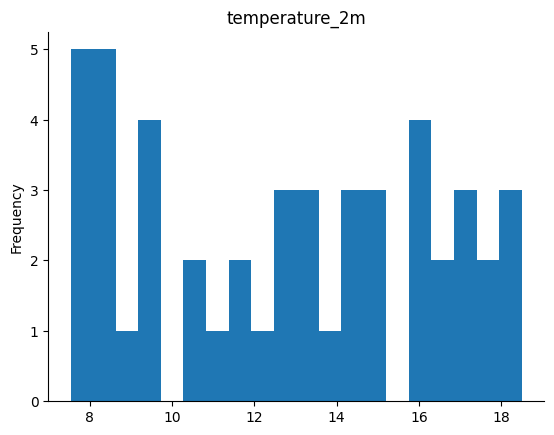

In [10]:
# @title temperature_2m

from matplotlib import pyplot as plt
data['temperature_2m'].plot(kind='hist', bins=20, title='temperature_2m')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Public Holidays API

In [ ]:
def get_public_holidays(countie : str, year : int):

  url = f"https://date.nager.at/api/v3/PublicHolidays/{year}/ES"

  response = requests.get(url)

  if response.status_code == 200:

    data = response.json()

    public_holidays_ES = [evento for evento in data if evento.get('counties') is None]
    public_holidays_CT = [evento for evento in data if evento.get('counties') is not None and 'ES-CT' in evento['counties']]

    return (public_holidays_ES, public_holidays_CT)

In [ ]:
get_public_holidays("ES-CT", 2024)

[[{'date': '2024-01-01',
   'localName': 'Año Nuevo',
   'name': "New Year's Day",
   'countryCode': 'ES',
   'fixed': False,
   'global': True,
   'counties': None,
   'launchYear': None,
   'types': ['Public']},
  {'date': '2024-01-06',
   'localName': 'Día de Reyes / Epifanía del Señor',
   'name': 'Epiphany',
   'countryCode': 'ES',
   'fixed': False,
   'global': True,
   'counties': None,
   'launchYear': None,
   'types': ['Public']},
  {'date': '2024-03-29',
   'localName': 'Viernes Santo',
   'name': 'Good Friday',
   'countryCode': 'ES',
   'fixed': False,
   'global': True,
   'counties': None,
   'launchYear': None,
   'types': ['Public']},
  {'date': '2024-05-01',
   'localName': 'Fiesta del trabajo',
   'name': 'Labour Day',
   'countryCode': 'ES',
   'fixed': False,
   'global': True,
   'counties': None,
   'launchYear': None,
   'types': ['Public']},
  {'date': '2024-08-15',
   'localName': 'Asunción',
   'name': 'Assumption',
   'countryCode': 'ES',
   'fixed': False,